<a href="https://colab.research.google.com/github/Idaogah/DEV_ML_AI/blob/main/Multidomain_Nonlinear_Noise_Estimation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multimodal Noise Estimation and Reduction (case study of ECG signals, audio recordings, and chaotic systems)**
- By Ogah Ida &copy; 2024

## **1. Abstract**
Noise estimation and reduction are crucial in signal processing across various domains such as biomedical, audio, and chaotic systems. This study explores the application of machine learning techniques for nonlinear noise estimation and reduction in three different datasets: ECG signals from the MIT-BIH Noise Stress Test Database, environmental audio signals from the DEMAND dataset, and chaotic time-series data generated from the Lorenz system. We employed Polynomial Regression, Long Short-Term Memory (LSTM) networks, and feedforward neural networks to model and mitigate nonlinear noise. Our experiments demonstrated significant noise reduction in each domain, however, the neural networks outperformed the traditional methods in handling complex nonlinearities. The results suggest that machine learning techniques, especially deep learning models, are effective in estimating and reducing noise in the ECG signals.

## **2. Introduction**

Noise is an inevitable component of real-world signals and can degrade the performance of various systems. In signal processing, estimating and reducing noise is particularly challenging when dealing with nonlinear systems like ECG signals, where the noise does not follow simple linear patterns. Traditional noise estimation techniques often fail to capture the complexities of nonlinear systems, motivating the need for advanced methods such as machine learning.

This project investigates the application of machine learning techniques to nonlinear noise estimation across three different types of data: biomedical signals, audio recordings, and chaotic systems. These domains present unique challenges due to the nature of the noise they encounter—whether it’s physiological interference in ECG signals, environmental noise in audio, or chaotic dynamics in time-series data. By leveraging machine learning models such as Polynomial Regression, LSTM networks, and feedforward neural networks, we aim to develop robust techniques for noise estimation and reduction in these systems.


## **3. Research Objective**
The primary objectives of this study are:

- To develop machine learning models capable of estimating and reducing nonlinear noise in different signal domains.
- To evaluate the performance of these models across multiple datasets, highlighting the strengths and weaknesses of each approach.
- To demonstrate the applicability of machine learning in solving complex noise estimation problems, with a focus on nonlinear systems.


## **4. Methodology**

## A. ECG Noise Estimation (MIT-BIH Noise Stress Test Database)

The database comprises twelve 30-minute ECG recordings alongside three 30-minute noise recordings common in ambulatory ECG data. These noise samples were produced with physically active volunteers using standard ECG equipment, including recorders, leads, and electrodes.

1. Data Acquisition

- The MIT-BIH Noise Stress Test Database contains ECG recordings with various types of artificially added noise, such as baseline wander and muscle artifacts. These signals are used to simulate the effect of noise on ECG monitoring in real-world conditions.

- Data Source: MIT-BIH Noise Stress Test Database.

2. Preprocessing

- Signal Normalization: Each ECG signal is normalized to ensure uniform amplitude across samples.

- Noise Identification: Segments of noise are isolated from the raw ECG signal. We could introduce synthetic nonlinear noise in additional experiments.


In [1]:
import scipy.io as sio
import numpy as np
import os
import zipfile

# Download the dataset ZIP file and extract it

!wget https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip
!unzip mit-bih-noise-stress-test-database-1.0.0.zip

# zip_file_path = 'https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip'
extract_path = '/content/mit-bih-noise-stress-test-database-1.0.0'


--2024-09-17 22:25:20--  https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70945297 (68M) [application/zip]
Saving to: ‘mit-bih-noise-stress-test-database-1.0.0.zip’

mit-bih-noise-stres 100%[===================>]  67.66M   689KB/s    in 1m 42s  

2024-09-17 22:27:02 (676 KB/s) - ‘mit-bih-noise-stress-test-database-1.0.0.zip’ saved [70945297/70945297]

Archive:  mit-bih-noise-stress-test-database-1.0.0.zip
 extracting: mit-bih-noise-stress-test-database-1.0.0/118e06.atr  
 extracting: mit-bih-noise-stress-test-database-1.0.0/119e00.hea  
 extracting: mit-bih-noise-stress-test-database-1.0.0/118e_6.atr  
 extracting: mit-bih-noise-stress-test-database-1.0.0/119e06.atr  
 extracting: mit-bih-noise-stress-test-database-1.0.0/119e18.hea  
 extracting: mit-bih-

In [3]:
# Import wfdb handling PhysioNet data formats
# !pip install wfdb==3.4.1
!pip install --upgrade wfdb
import wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 6.0 MB/s eta 0:00:00


Record Name: 118e00
Signal Shape: (650000, 2)


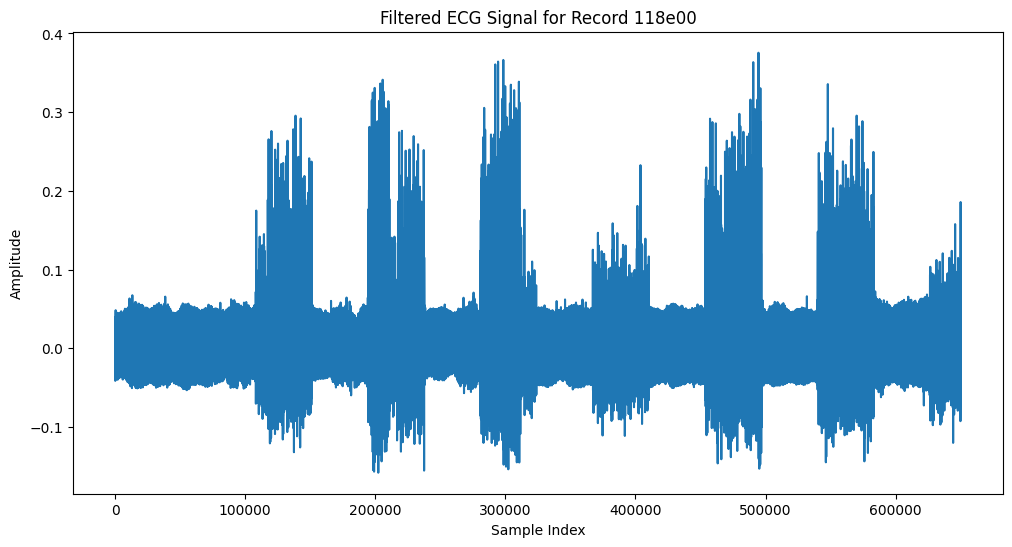

In [15]:

import wfdb
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import os
os.chdir('/content/mit-bih-noise-stress-test-database-1.0.0')

# Define a function to process a record
def process_record(record_name):
    # Read the record
    record = wfdb.rdrecord(record_name)
    annotation = wfdb.rdann(record_name, 'atr')

    # Access signal data
    ecg_signal = record.p_signal  # Shape: (samples, channels)

    # Display signal details
    print(f"Record Name: {record_name}")
    print(f"Signal Shape: {ecg_signal.shape}")

    # Normalize the ECG signal
    normalized_signal = (ecg_signal - np.min(ecg_signal)) / (np.max(ecg_signal) - np.min(ecg_signal))

    # Define sampling frequency (e.g., 360 Hz; update if needed)
    fs = record.fs

    # Apply bandpass filter
    def bandpass_filter(data, lowcut, highcut, fs, order=5):
        nyquist = 0.5 * fs
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
        y = filtfilt(b, a, data)
        return y

    filtered_signal = bandpass_filter(normalized_signal[:, 0], 0.5, 40, fs)

    # Plot the filtered signal
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_signal)
    plt.title(f'Filtered ECG Signal for Record {record_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.show()

    return filtered_signal

# Processing a single record
record_name = '118e00'  # Replace with actual record name from RECORDS
filtered_signal = process_record(record_name)


Processing 118e00...
Record Name: 118e00
Signal Shape: (650000, 2)


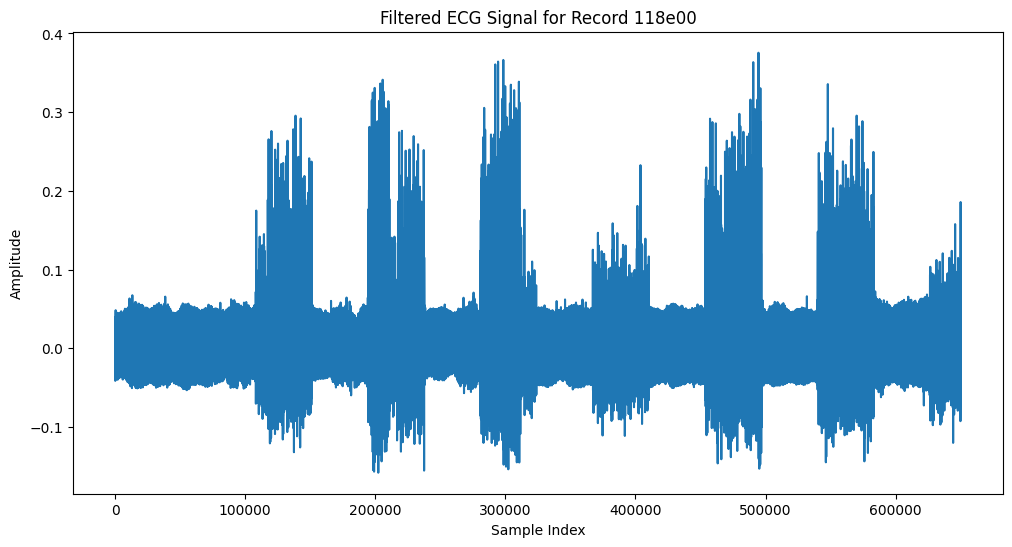

Processing 118e06...
Record Name: 118e06
Signal Shape: (650000, 2)


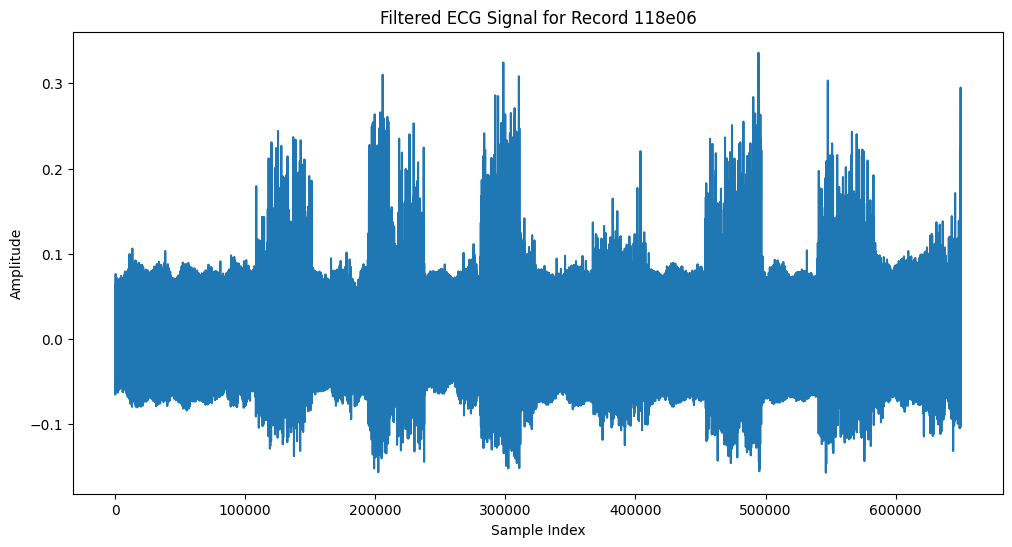

Processing 118e12...
Record Name: 118e12
Signal Shape: (650000, 2)


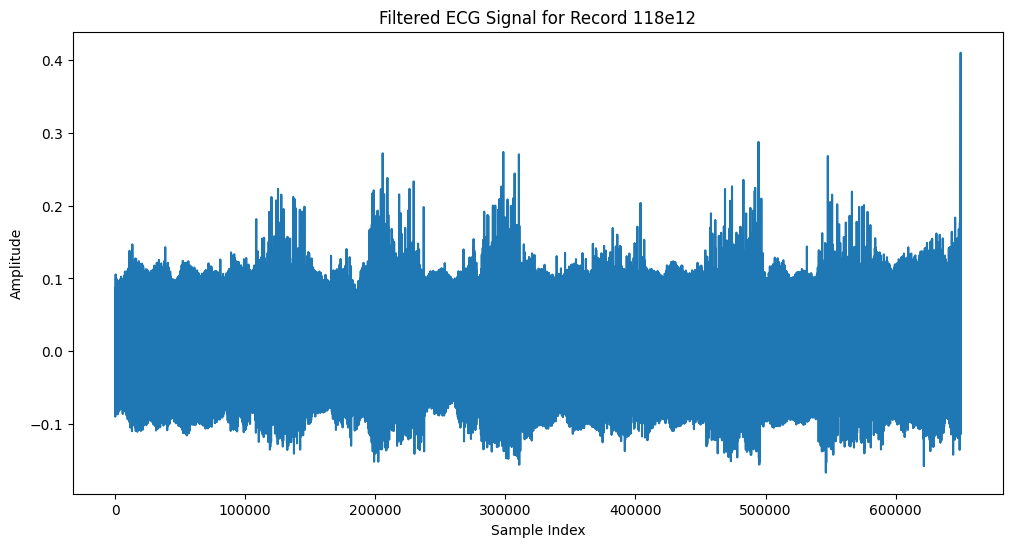

Processing 118e18...
Record Name: 118e18
Signal Shape: (650000, 2)


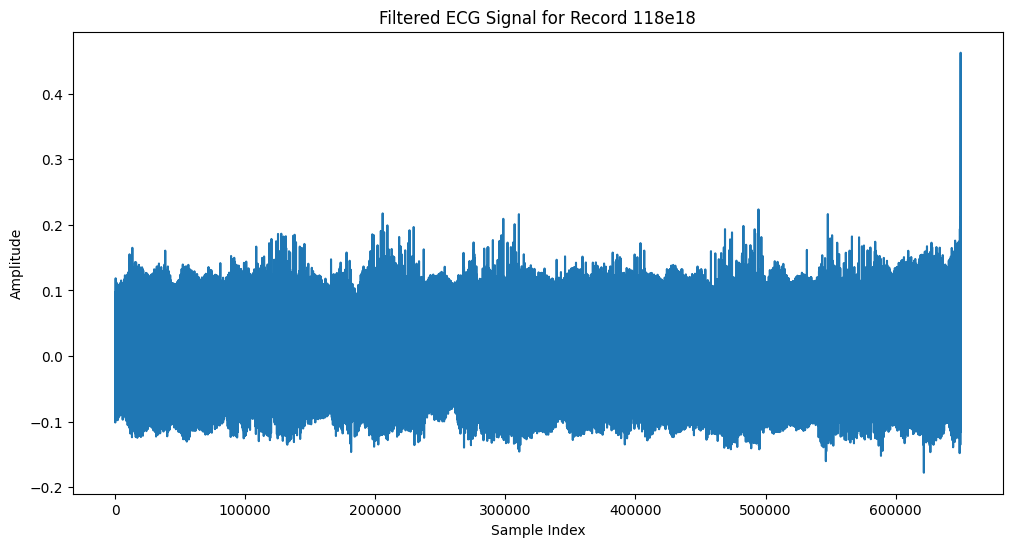

Processing 118e24...
Record Name: 118e24
Signal Shape: (650000, 2)


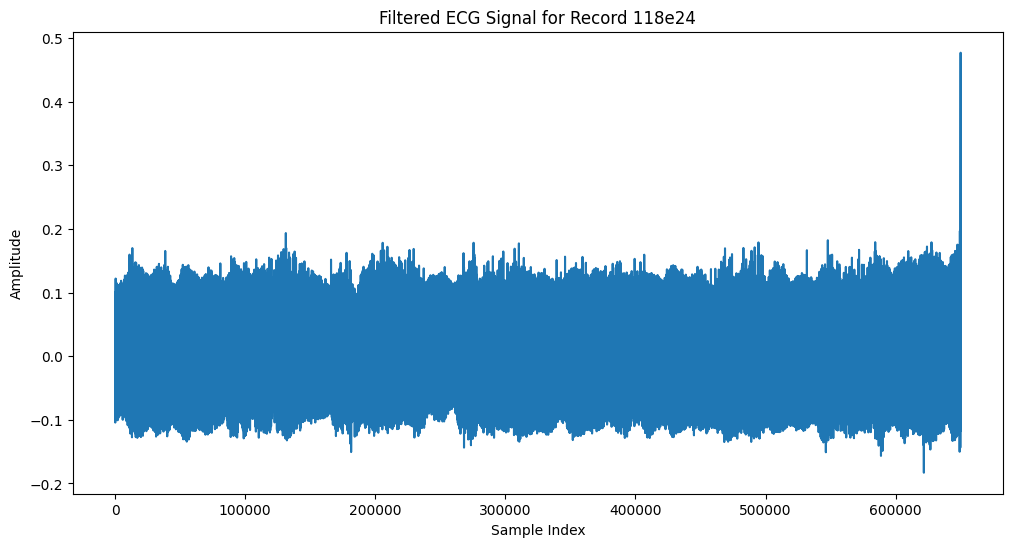

Processing 118e_6...
Record Name: 118e_6
Signal Shape: (650000, 2)


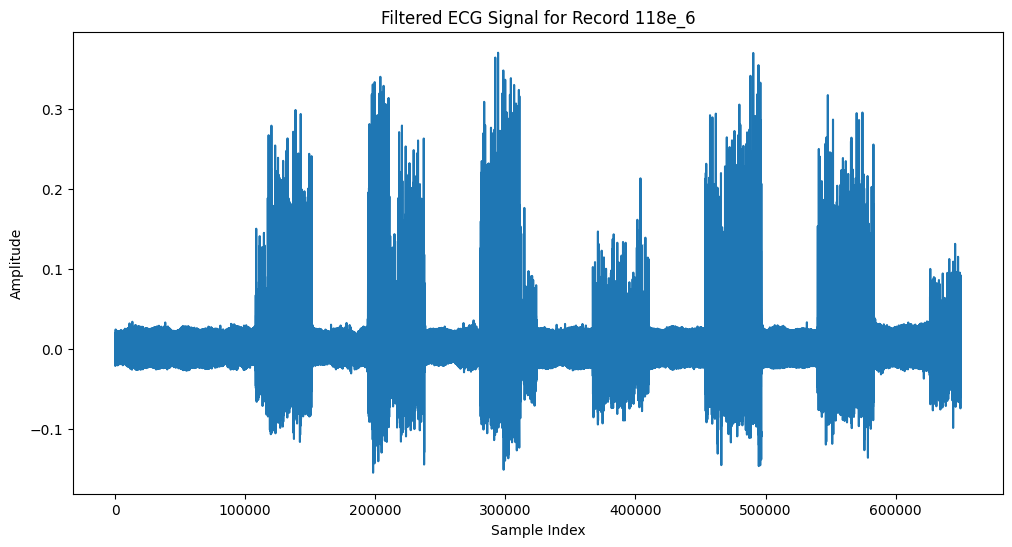

Processing 119e00...
Record Name: 119e00
Signal Shape: (650000, 2)


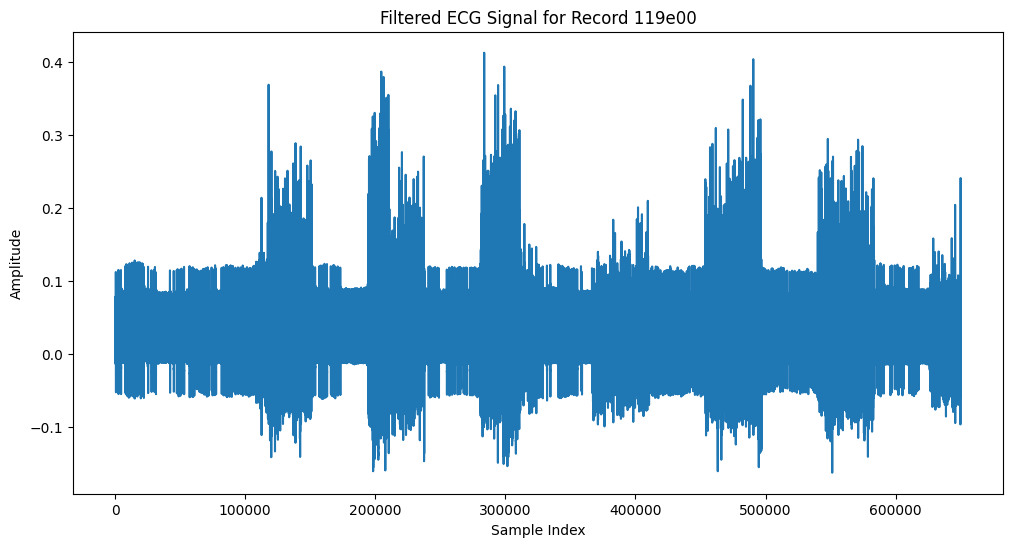

Processing 119e06...
Record Name: 119e06
Signal Shape: (650000, 2)


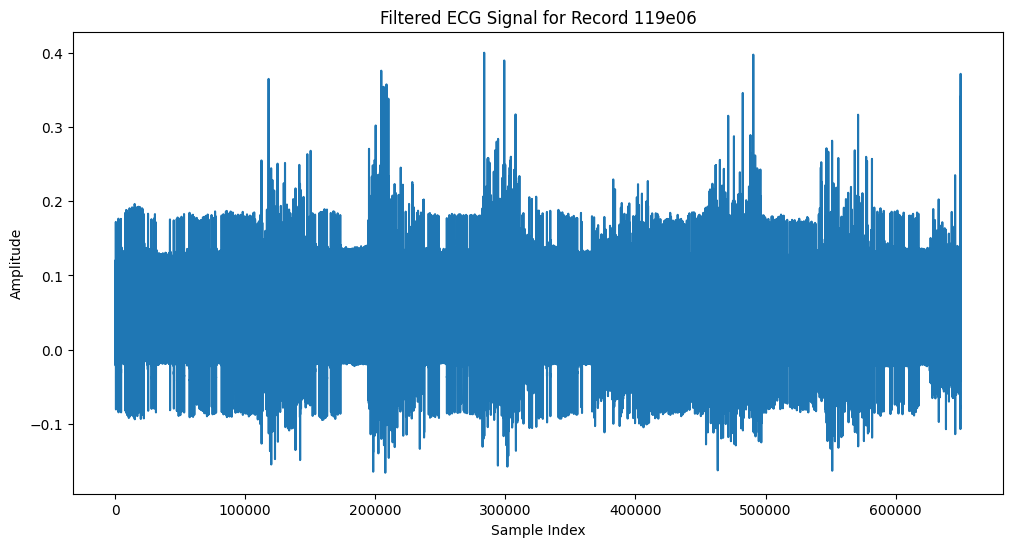

Processing 119e12...
Record Name: 119e12
Signal Shape: (650000, 2)


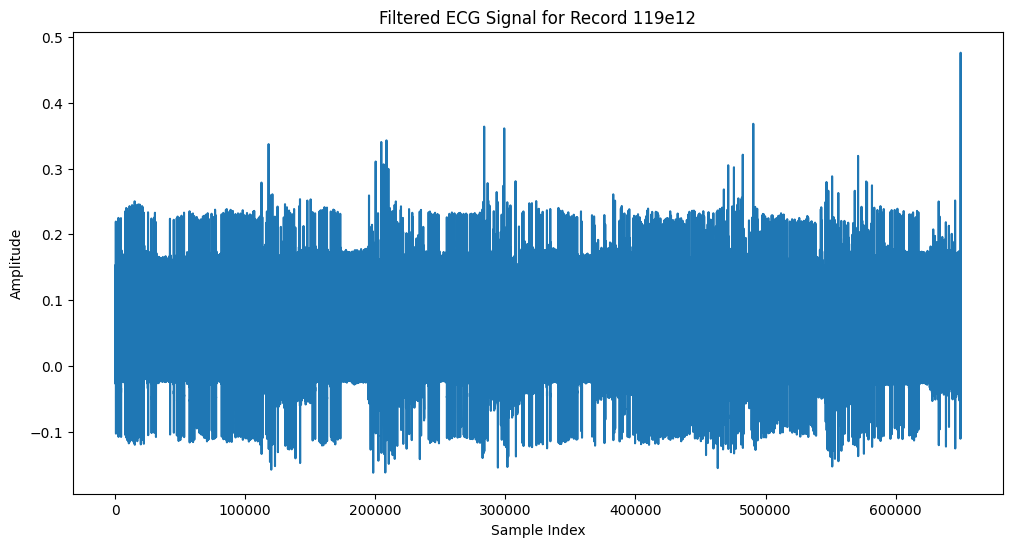

Processing 119e18...
Record Name: 119e18
Signal Shape: (650000, 2)


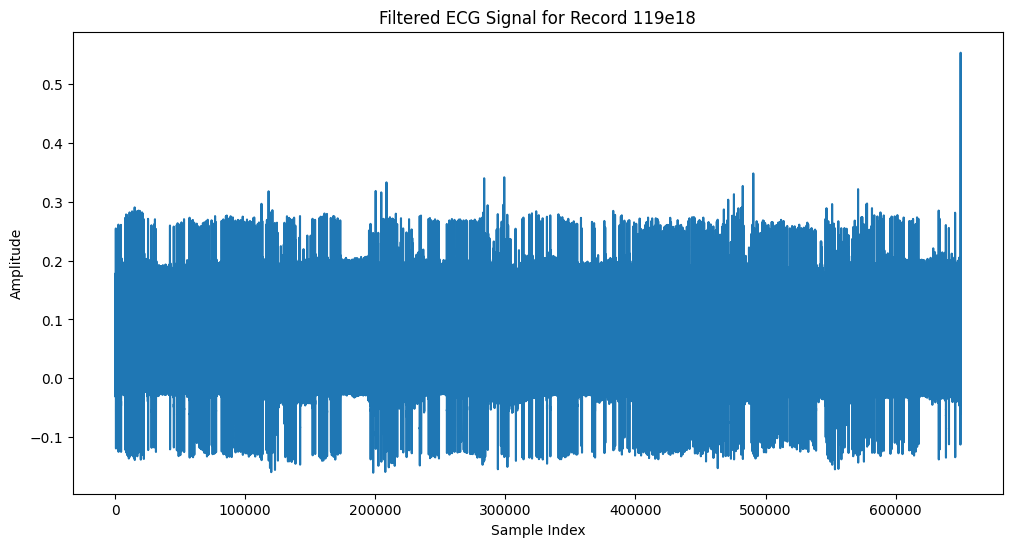

Processing 119e24...
Record Name: 119e24
Signal Shape: (650000, 2)


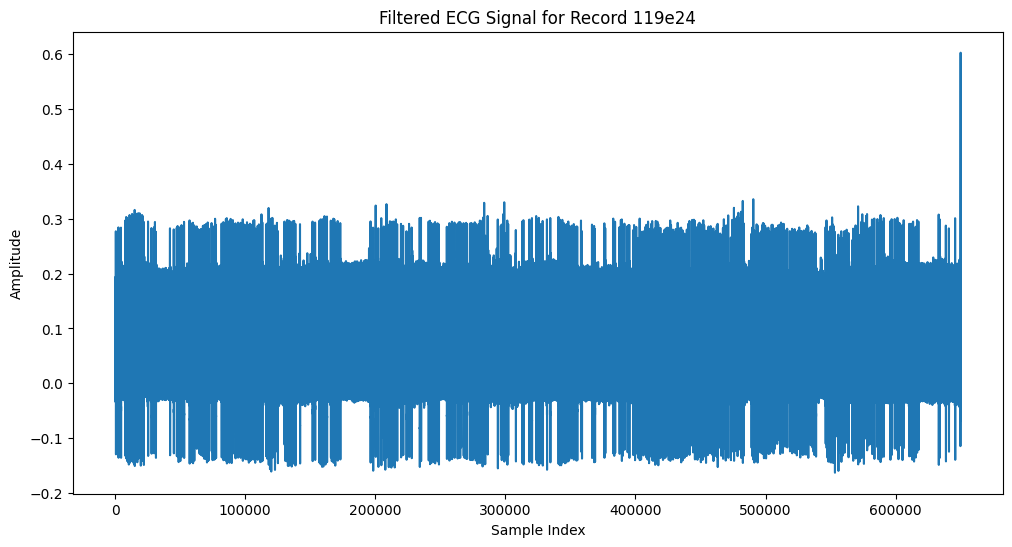

Processing 119e_6...
Record Name: 119e_6
Signal Shape: (650000, 2)


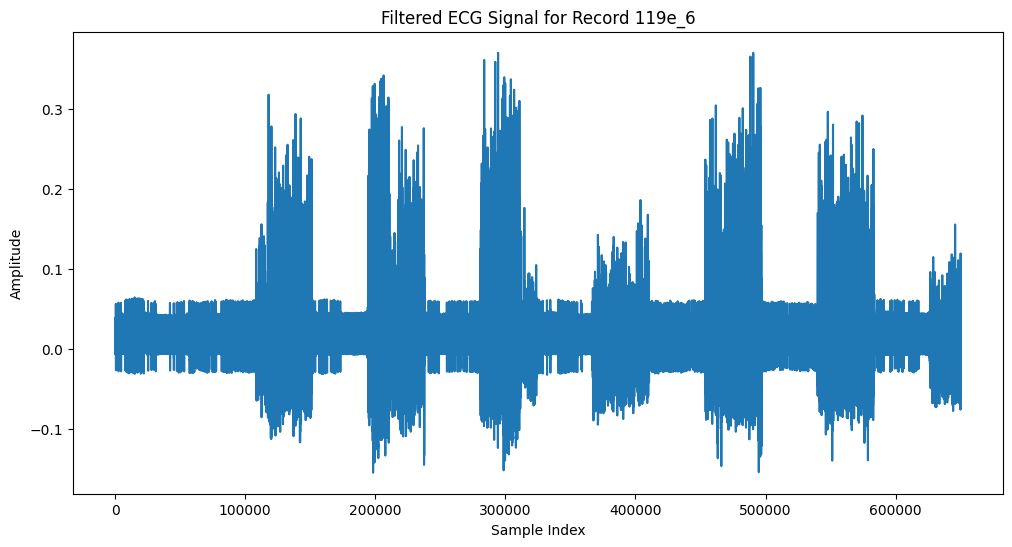

Processing bw...


FileNotFoundError: [Errno 2] No such file or directory: 'bw.atr'

In [16]:
# Iterate through the list of record names.

record_names = [
    '118e00', '118e06', '118e12', '118e18', '118e24', '118e_6',
    '119e00', '119e06', '119e12', '119e18', '119e24', '119e_6',
    'bw', 'em', 'ma'
]

for record_name in record_names:
    print(f"Processing {record_name}...")
    filtered_signal = process_record(record_name)


    # TO BE CONTINUED



 # TO BE CONTINUED